In [1]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import matplotlib.image as mpimg
import os
import pandas as pd
import seaborn as sns
from sklearn.utils import shuffle
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, \
AveragePooling2D, MaxPooling2D

# Datasets Loading

In [2]:
def load_dataset(data_path, max_species=100, shuffled=True, grayscale=False,
                 flatten=False):
    
    data_images = []
    data_labels = []
    
    for num_species, specie in enumerate(os.listdir(data_path)):
        images_path = os.path.join(data_path, specie)
        for i in os.listdir(images_path):
            image_path = os.path.join(images_path, i)
            im = Image.open(image_path)
            
            if grayscale:
                im = im.convert("L")
            arr = np.asarray(im)
            
            if flatten:
                arr = arr.flatten()
            data_images.append(arr)
            data_labels.append(specie)
            
        if num_species == max_species-1:
            break
            
    data_images = np.array(data_images)
    data_labels = np.array(data_labels)
    
    if shuffled:
        X, y = shuffle(data_images, data_labels, random_state=1)
        
    return X, y

Paths to train, validation and test sets:

In [3]:
train_path = 'data/200_species_train'
valid_path = 'data/200_species_valid/'
test_path = 'data/200_species_test/'

Let's define the **maximal number of species to be currently classified**:

In [4]:
N_SPECIES = 50

Now load the datasets:

In [5]:
X_train, y_train = load_dataset(train_path, max_species=N_SPECIES)
X_valid, y_valid = load_dataset(valid_path, max_species=N_SPECIES)
X_test,  y_test  = load_dataset(test_path,  max_species=N_SPECIES)

In [6]:
X_train.shape, y_train.shape, X_valid.shape, y_valid.shape, X_test.shape, y_test.shape

((6764, 224, 224, 3),
 (6764,),
 (250, 224, 224, 3),
 (250,),
 (250, 224, 224, 3),
 (250,))

Converting the labels into *one-hot* representation:

In [7]:
lenc = LabelEncoder()
y_train = to_categorical( lenc.fit_transform(y_train) )
y_valid = to_categorical( lenc.transform(y_valid) )
y_test  = to_categorical( lenc.transform(y_test) )

In [8]:
y_train.shape, y_valid.shape, y_test.shape

((6764, 50), (250, 50), (250, 50))

And normalizing all pixels values into the range of 0-1 (instead of 0-255):

In [9]:
X_train = X_train / 255
X_valid = X_valid / 255
X_test  = X_test / 255

Let's examine one picture to make sure things are working:

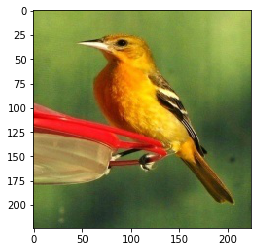

In [10]:
plt.imshow(X_train[0]);

# LeNet

The LeNet CNN is constructed as following:
* A convolution layer of 6 filters, each of size 5x5, with *tanh* activation fanction (let's call it C1). Get the 32x32x3 images as inputs.
* An average pooling layer of size 2x2 and strides of 2x2 (named S2).
* Another convolution layer of 16 filters, each of size 5x5, with *tanh* activation fanction (C3).
* Another average pooling layer of size 2x2 and strides of 1x1 (named S4).
* A convolution layer of 120 filters, each of size 5x5, with *tanh* activation fanction (C5).
* A flatten layer, put to allow the use of fully-conected (dense) layers (will be called "flat").
* A fully-connected layer of 84 neurons with *tanh* activation function (named FC6).
* A fully-connected layer of 10 neurons (as the number of possible labels), with a *softmax* activation function (named "out").

In [11]:
# lenet = Sequential()

# lenet.add( Conv2D(filters=6, kernel_size=5, activation="tanh",
#                   input_shape=(X_train.shape[1], X_train.shape[2],
#                                X_train.shape[3]),
#                   name='C1') )

# lenet.add( AveragePooling2D(pool_size=2, strides=2, name="S2") )

# lenet.add( Conv2D(filters=16, kernel_size=5, activation="tanh", name="C3") )

# lenet.add( AveragePooling2D(pool_size=2, strides=2, name="S4") )

# lenet.add( Conv2D(filters=120, kernel_size=5, activation="tanh", name="C5") )

# lenet.add( Flatten(name="flat") )

# lenet.add( Dense(84, activation="tanh", name="FC6") )

# lenet.add( Dense(N_SPECIES, activation="softmax", name="Out") )

Let's examine our model:

In [12]:
# lenet.summary()

The model will be using **categorical cross-entropy** as a loss function, an **Adam** optimizer and **accuracy, precision and recall** as the metrics to be evaluated by:

In [13]:
# lenet.compile(loss="categorical_crossentropy", optimizer="adam",
#               metrics=["acc", "Precision", "Recall"])

We can now train our model. Let's try **batches of 32**, **10 epochs** and using the **validation set** to validate the model:

In [14]:
# results = lenet.fit( X_train, y_train, batch_size=32, epochs=10,
#                      validation_data=(X_valid, y_valid),
#                      use_multiprocessing=True )

The network gave extremely poor result! Must use other configurations.

# Trying Custom-Made CNN:

In [15]:
# try_net = Sequential()

# try_net.add( Conv2D(filters=128, kernel_size=5, activation="relu",
#                     input_shape=(X_train.shape[1], X_train.shape[2],
#                                  X_train.shape[3]),
#                     name='C1') )

# try_net.add( MaxPooling2D(pool_size=2, strides=2, name="S2") )

# try_net.add( Conv2D(filters=64, kernel_size=5, activation="relu", name="C3") )

# try_net.add( MaxPooling2D(pool_size=2, strides=2, name="S4") )

# try_net.add( Conv2D(filters=64, kernel_size=5, activation="relu", name="C5") )

# try_net.add( MaxPooling2D(pool_size=2, strides=2, name="S6") )

# try_net.add( Conv2D(filters=64, kernel_size=5, activation="relu", name="C7") )

# try_net.add( MaxPooling2D(pool_size=2, strides=2, name="S8") )

# try_net.add( Conv2D(filters=128, kernel_size=5, activation="relu", name="C9") )

# try_net.add( Flatten(name="flat") )

# try_net.add( Dense(N_SPECIES, activation="relu", name="FC10") )

# try_net.add( Dense(N_SPECIES, activation="softmax", name="Out") )

In [16]:
# try_net.summary()

In [17]:
# try_results = try_net.fit( X_train, y_train, batch_size=32, epochs=10,
#                          validation_data=(X_valid, y_valid),
#                          use_multiprocessing=True )

# ResNet50 - Logistic Regression:

## Resnet Part:

We simply load the *ResNet50* model with the weights trained on *ImageNet*, then add a flattening layer to have all of the features obtained by the network.

The weights remains unchanged and we're not training the network - just use its forward propagation to "predict" the feature values of all images in our datasets.

In [11]:
#Transfer learning using Resnet50 trained on Imagnet
resnet = ResNet50(input_shape=(224, 224, 3), weights='imagenet',
                  include_top=False)

# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False
    
# build new nn which take as base model resnet50
flat = Flatten()(resnet.output)
model = Model(inputs=resnet.input, outputs=flat)
model.summary()

# tf.keras.utils.plot_model(model, 'model.png', show_shapes=True)

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

## Logistic Regression Part:

Let's get the values of each feature after forward propagating through the ResNet50 model and added flattening layer:

In [12]:
X_train_after_flatten = model.predict(X_train, use_multiprocessing=True)

In [13]:
X_valid_after_flatten = model.predict(X_valid, use_multiprocessing=True)

Verifying the shape of results is the number of images X number of features after flattening layer:

In [14]:
X_train_after_flatten.shape, X_valid_after_flatten.shape

((6764, 100352), (250, 100352))

We should also examine a scaling of the datassets, as the values may vary a lot:

In [15]:
X_train_after_flatten.min(), X_train_after_flatten.max()

(0.0, 23.240736)

In [16]:
X_valid_after_flatten.min(), X_valid_after_flatten.max()

(0.0, 21.16434)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
mmscaler = MinMaxScaler()

X_train_after_flatten = mmscaler.fit_transform(X_train_after_flatten)

X_valid_after_flatten = mmscaler.transform(X_valid_after_flatten)

In [25]:
X_train_after_flatten.min(), X_train_after_flatten.max()

(0.0, 1.0000005)

In [20]:
X_valid_after_flatten.min(), X_valid_after_flatten.max()

(-0.1920194, 10.518049)

Now create a Logistic Regression classifier and train it (*np.argmax* is used to return the labels into a single value representation instead of one-hot):

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
log_reg = LogisticRegression(multi_class="multinomial", random_state=1,
                             max_iter=500, n_jobs=-1)

In [29]:
log_reg.fit(X_train_after_flatten, np.argmax(y_train, axis=1))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

And finally examine its predictions on the validation set:

In [30]:
from sklearn.metrics import plot_confusion_matrix

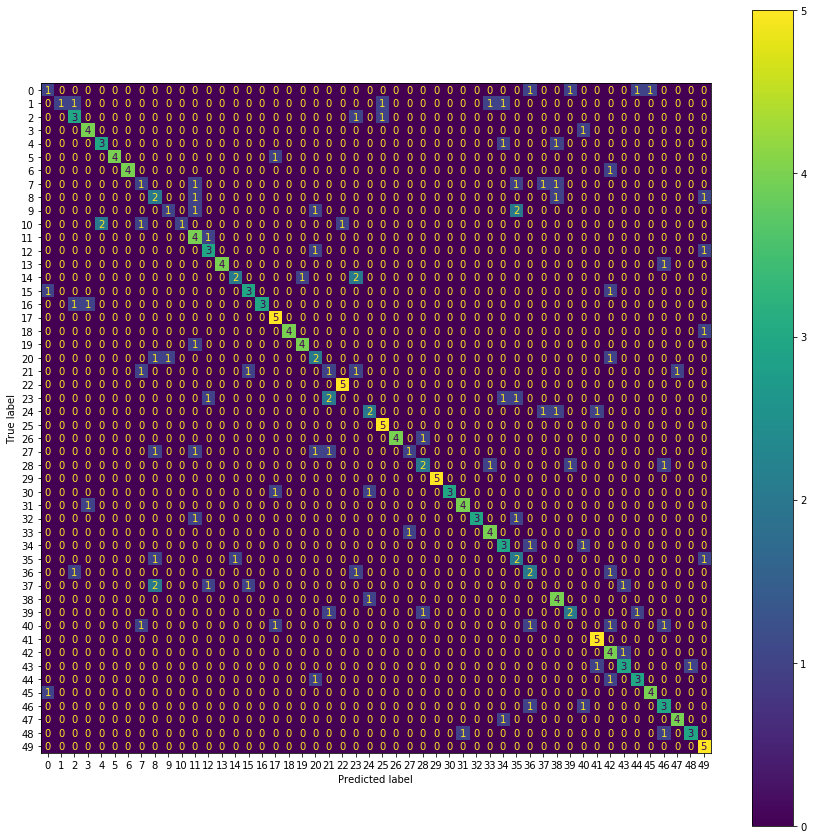

In [37]:
f, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(log_reg, X_valid_after_flatten,
                      np.argmax(y_valid, axis=1), ax=ax);

In [38]:
from sklearn.metrics import classification_report

In [40]:
print( classification_report( np.argmax(y_valid, axis=1),
                              log_reg.predict(X_valid_after_flatten),
                              labels=range(N_SPECIES) ) )

              precision    recall  f1-score   support

           0       0.33      0.20      0.25         5
           1       1.00      0.20      0.33         5
           2       0.50      0.60      0.55         5
           3       0.67      0.80      0.73         5
           4       0.60      0.60      0.60         5
           5       1.00      0.80      0.89         5
           6       1.00      0.80      0.89         5
           7       0.25      0.20      0.22         5
           8       0.29      0.40      0.33         5
           9       0.50      0.20      0.29         5
          10       1.00      0.20      0.33         5
          11       0.40      0.80      0.53         5
          12       0.50      0.60      0.55         5
          13       1.00      0.80      0.89         5
          14       0.67      0.40      0.50         5
          15       0.60      0.60      0.60         5
          16       1.00      0.60      0.75         5
          17       0.62    

## Combining Dimension Reduction with PCA:

In [41]:
from sklearn.decomposition import PCA

Let's try using 80% of the explained varaince:

In [42]:
pca = PCA(n_components=0.8, random_state=1)

In [43]:
X_train_after_flatten_pca = pca.fit_transform(X_train_after_flatten)

X_valid_after_flatten_pca = pca.transform(X_valid_after_flatten)

In [44]:
X_train_after_flatten_pca.shape, X_valid_after_flatten_pca.shape

((6764, 164), (250, 164))

The amount of features were reduced by 3 orders of magnitude!

Now use Logistic Regression with the reduced parameters:

In [45]:
log_reg_pca = LogisticRegression(multi_class="multinomial", random_state=1,
                                 max_iter=500, n_jobs=-1, verbose=1)

In [46]:
log_reg_pca.fit(X_train_after_flatten_pca, np.argmax(y_train, axis=1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    9.3s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

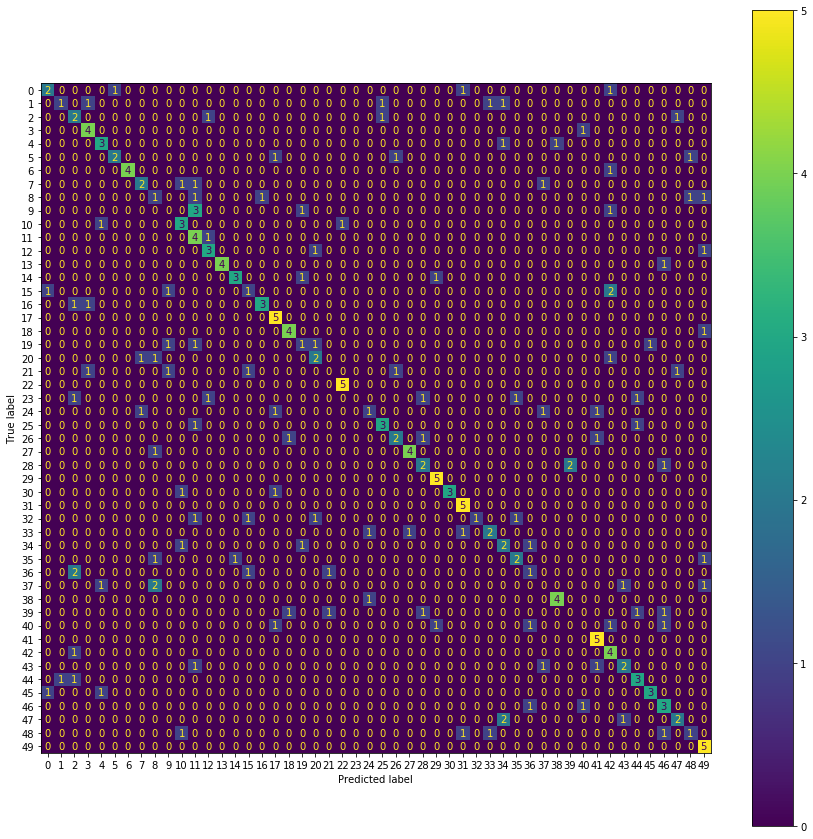

In [47]:
f, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(log_reg_pca, X_valid_after_flatten_pca,
                      np.argmax(y_valid, axis=1), ax=ax);

In [49]:
print( classification_report( np.argmax(y_valid, axis=1),
                              log_reg_pca.predict(X_valid_after_flatten_pca),
                              labels=range(N_SPECIES) ) )

              precision    recall  f1-score   support

           0       0.50      0.40      0.44         5
           1       0.50      0.20      0.29         5
           2       0.25      0.40      0.31         5
           3       0.57      0.80      0.67         5
           4       0.50      0.60      0.55         5
           5       0.67      0.40      0.50         5
           6       1.00      0.80      0.89         5
           7       0.50      0.40      0.44         5
           8       0.17      0.20      0.18         5
           9       0.00      0.00      0.00         5
          10       0.43      0.60      0.50         5
          11       0.31      0.80      0.44         5
          12       0.50      0.60      0.55         5
          13       1.00      0.80      0.89         5
          14       0.75      0.60      0.67         5
          15       0.25      0.20      0.22         5
          16       0.75      0.60      0.67         5
          17       0.56    

C:\Users\matanf2006\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


___
Let's check if 90% of the explained varaince would give better results:

In [50]:
pca2 = PCA(n_components=0.9, random_state=1)

In [51]:
X_train_after_flatten_pca2 = pca2.fit_transform(X_train_after_flatten)

X_valid_after_flatten_pca2 = pca2.transform(X_valid_after_flatten)

In [52]:
X_train_after_flatten_pca2.shape, X_valid_after_flatten_pca2.shape

((6764, 533), (250, 533))

Now use Logistic Regression with the reduced parameters:

In [53]:
log_reg_pca2 = LogisticRegression(multi_class="multinomial", random_state=1,
                                  max_iter=500, n_jobs=-1, verbose=1)

In [54]:
log_reg_pca2.fit(X_train_after_flatten_pca2, np.argmax(y_train, axis=1))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   16.6s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='multinomial', n_jobs=-1, penalty='l2',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

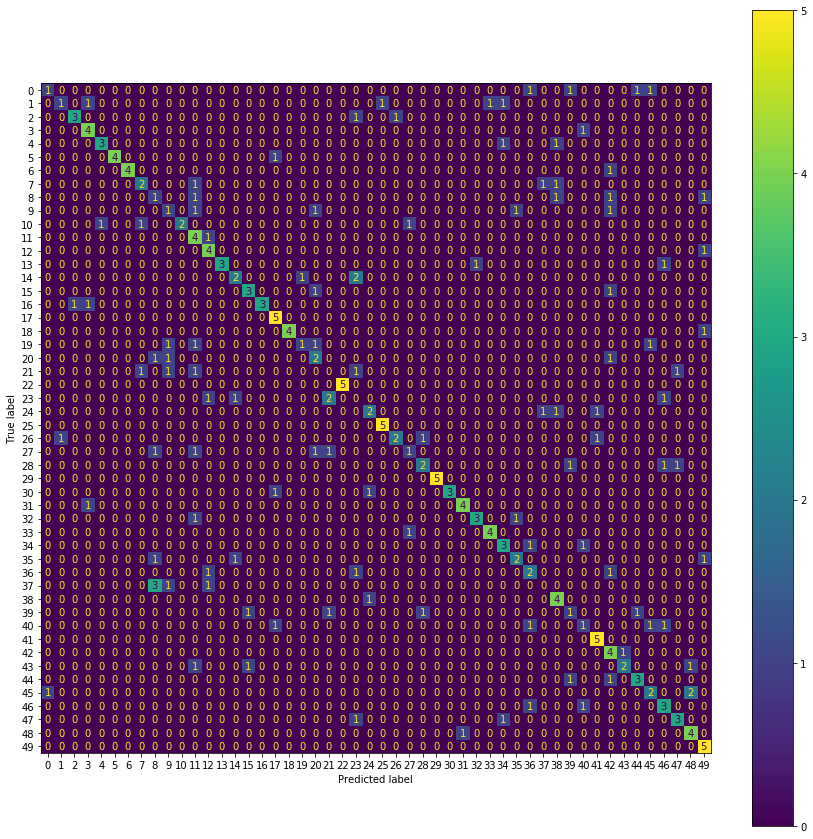

In [55]:
f, ax = plt.subplots(figsize=(15,15))
plot_confusion_matrix(log_reg_pca2, X_valid_after_flatten_pca2,
                      np.argmax(y_valid, axis=1), ax=ax);

In [56]:
print( classification_report( np.argmax(y_valid, axis=1),
                              log_reg_pca2.predict(X_valid_after_flatten_pca2),
                              labels=range(N_SPECIES) ) )

              precision    recall  f1-score   support

           0       0.50      0.20      0.29         5
           1       0.50      0.20      0.29         5
           2       0.75      0.60      0.67         5
           3       0.57      0.80      0.67         5
           4       0.75      0.60      0.67         5
           5       1.00      0.80      0.89         5
           6       1.00      0.80      0.89         5
           7       0.50      0.40      0.44         5
           8       0.14      0.20      0.17         5
           9       0.20      0.20      0.20         5
          10       1.00      0.40      0.57         5
          11       0.33      0.80      0.47         5
          12       0.50      0.80      0.62         5
          13       1.00      0.60      0.75         5
          14       0.50      0.40      0.44         5
          15       0.60      0.60      0.60         5
          16       1.00      0.60      0.75         5
          17       0.62    

# Dumping to Pickle:

In [57]:
import pickle